In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import altair as alt
import sweetviz as sv
import warnings
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
loaded_dfs = []

#District & School Codes
cmas_results_data = pd.read_excel('Practicum Data/22-23 CMAS ELA and Math District and School Results.xlsx')
loaded_dfs.append(cmas_results_data)

#District Codes Only
dist_grad_data = pd.read_excel('Practicum Data/22-23 Graduation Rates District.xlsx')
loaded_dfs.append(dist_grad_data)
dist_dropout_data = pd.read_excel('Practicum Data/22-23 Dropout Rates District.xlsx')
loaded_dfs.append(dist_dropout_data)
avg_teacher_salary = pd.read_excel('Practicum Data/22-23 AverageTeachersSalary.FTE.xlsx')
loaded_dfs.append(avg_teacher_salary)
psych_stud_ratio = pd.read_excel('Practicum Data/22-23 District Psychologist Data.xlsx')
loaded_dfs.append(psych_stud_ratio)
counselor_stud_ratio = pd.read_excel('Practicum Data/22-23 District Counselor Data.xlsx')
loaded_dfs.append(counselor_stud_ratio)
so_worker_stud_ratio = pd.read_excel('Practicum Data/22-23 District Social Worker Data.xlsx')
loaded_dfs.append(so_worker_stud_ratio)
teacher_demo_data = pd.read_excel('Practicum Data/22-23 Count of Teachers by District Ethnicity and Gender.xlsx')
loaded_dfs.append(teacher_demo_data)
principal_demo_data = pd.read_excel('Practicum Data/22-23 Principals race gender district.xlsx')
loaded_dfs.append(principal_demo_data)
avg_admin_salary = pd.read_excel('Practicum Data/22-23 Principal and Assistant Principal by Average Salary by District.xlsx')
loaded_dfs.append(avg_admin_salary)
personnel_turnover_data = pd.read_excel('Practicum Data/22-23 PersonelTurnoverRates.xlsx')
loaded_dfs.append(personnel_turnover_data)
dist_stud_teach_ratio = pd.read_excel('Practicum Data/22-23 District Student Teacher Ratio.xlsx')
loaded_dfs.append(dist_stud_teach_ratio)
absence_data = pd.read_excel('Practicum Data/22-23 ChronicAbsenteeism.xlsx')
loaded_dfs.append(absence_data)
ipst_data = pd.read_excel('Practicum Data/22-23 IPST.xlsx')
loaded_dfs.append(ipst_data)
rural_data = pd.read_excel('Practicum Data/22-23_District_RuralStatus.xlsx')
loaded_dfs.append(rural_data)


In [3]:
# Normalize all columns in terms of lowercase and underscores
for df in loaded_dfs:
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    if 'organization_code' in df.columns:
        df.rename(columns={'organization_code': 'district_code'}, inplace=True)

# Data Observation

## District and School Data

In [4]:
cmas_results_data.head()

,level,district_code,district_name,school_code,school_name,content,grade,participation_rate_2023,mean_scale_score,standard_deviation,percent_met_or_exceeded_expectations,congressional_district
0,DISTRICT,10,Mapleton 1,0,All Schools,English Language Arts,All Grades,93.7,723,32,21.8,8th Congressional District
1,DISTRICT,10,Mapleton 1,0,All Schools,Spanish Language Arts,All Grades,93.8,- -,- -,- -,8th Congressional District
2,DISTRICT,10,Mapleton 1,0,All Schools,Mathematics,All Grades,94.5,717,29,13.8,8th Congressional District
3,DISTRICT,20,Adams 12 Five Star Schools,0,All Schools,English Language Arts,All Grades,87.4,740,38,40.9,8th Congressional District
4,DISTRICT,20,Adams 12 Five Star Schools,0,All Schools,Spanish Language Arts,All Grades,100.0,714,28,- -,8th Congressional District


## District Only Data

In [5]:
dist_grad_data.head()

,county_name,district_code,all_students_graduation_rate,female_graduation_rate,male_graduation_rate,american_indian_or_alaska_native_graduation_rate,asian_graduation_rate,black_or_african_american_graduation_rate,hispanic_or_latino_graduation_rate,white_graduation_rate,native_hawaiian_or_other_pacific_islander_graduation_rate,two_or_more_races_graduation_rate
0,ADAMS,10,68.5%,71.6%,65.4%,33.3%,>= 98%,>= 98%,70.3%,49.2%,<= 2%,69.2%
1,ADAMS,20,84.8%,86.5%,83.3%,73.7%,94.0%,90.7%,76.8%,91.5%,>= 98%,94.1%
2,ADAMS,30,68.8%,75.8%,62.1%,<= 2%,>= 98%,87.5%,70.8%,50.0%,<= 2%,25.0%
3,ADAMS,40,88.1%,90.8%,85.6%,>= 98%,91.2%,94.9%,86.3%,89.7%,75.0%,88.2%
4,ADAMS,50,84.7%,80.9%,88.2%,>= 98%,<= 2%,>= 98%,76.2%,92.0%,<= 2%,66.7%


In [6]:
dist_dropout_data.head()

,county_name,district_code,dropout_rate:_all_students,female_dropout_rate,male_dropout_rate,american_indian_or_alaska_native_dropout_rate,asian_dropout_rate,black_or_african_american_dropout_rate,hispanic_or_latino_dropout_rate,white_dropout_rate,native_hawaiian_or_other_pacific_islander_dropout_rate,two_or_more_races_dropout_rate
0,ADAMS,10,3.3%,2.8%,3.8%,13.3%,<= 0.5%,3.9%,3.1%,3.7%,<= 0.5%,4.0%
1,ADAMS,20,2.3%,2.0%,2.5%,2.9%,<= 0.5%,2.2%,3.3%,1.5%,<= 0.5%,1.3%
2,ADAMS,30,5.6%,4.6%,6.5%,4.8%,16.7%,11.9%,5.4%,5.6%,66.7%,2.9%
3,ADAMS,40,1.3%,1.1%,1.6%,2.2%,<= 0.5%,<= 0.5%,1.6%,1.2%,9.5%,0.7%
4,ADAMS,50,1.1%,1.7%,<= 0.5%,<= 0.5%,<= 0.5%,<= 0.5%,0.6%,1.3%,<= 0.5%,4.8%


In [7]:
avg_teacher_salary.head()

,district_code,organization_name,charter_schools_total_fte,charter_schools_average_salary,non-charter_schools_total_fte,non-charter_schools_average_salary,all_schools_total_fte,all_schools_average_salary
0,10,Mapleton 1,0.0000,0,403.4928,73911,403.4928,73911
1,20,Adams 12 Five Star Schools,184.8385,45826,1852.8690,71543,2037.7075,69211
2,30,Adams County 14,0.0000,0,328.9889,68314,328.9889,68314
3,40,School District 27J,193.0262,45817,966.4515,61669,1159.4777,59030
4,50,Bennett 29J,0.0000,0,71.5576,45001,71.5576,45001


In [8]:
teacher_demo_data.head()

,school_year,district_code,district_name,_american_indian_or_alaska_native_female,american_indian_or_alaska_native_male,american_indian_or_alaska_native_total,asian_female,asian_male,asian_total,black_or_african_american_female,...,native_hawaiian_or_other_pacific_islander_female,native_hawaiian_or_other_pacific_islander_male,native_hawaiian_or_other_pacific_islander_total,two_or_more_races_female,two_or_more_races_male,two_or_more_races_total,white_female,white_male,white_total,total_teachers
0,2022-2023,10,Mapleton 1,1,0,1,3,2,5,2,...,4,0,4,0,0,0,239,90,329,410
1,2022-2023,20,Adams 12 Five Star Schools,5,0,5,29,6,35,6,...,1,0,1,21,7,28,1372,430,1802,2079
2,2022-2023,30,Adams County 14,1,2,3,5,0,5,10,...,1,1,2,0,0,0,144,75,219,345
3,2022-2023,40,School District 27J,6,6,12,12,5,17,10,...,4,1,5,5,0,5,751,232,983,1161
4,2022-2023,50,Bennett 29J,0,0,0,0,2,2,3,...,0,0,0,0,0,0,48,20,68,74


In [9]:
principal_demo_data.head()

,district_code,district_name,_american_indian_or_alaska_native_female,american_indian_or_alaska_native_male,american_indian_or_alaska_native_total,asian_female,asian_male,asian_total,black_or_african_american_female,black_or_african_american_male,...,native_hawaiian_or_other_pacific_islander_female,native_hawaiian_or_other_pacific_islander_male,native_hawaiian_or_other_pacific_islander_total,two_or_more_races_female,two_or_more_races_male,two_or_more_races_total,white_female,white_male,white_total,total_principals
0,10,Mapleton 1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,21,12,33,39
1,20,Adams 12 Five Star Schools,0,0,0,2,0,2,0,1,...,0,0,0,1,0,1,79,33,112,137
2,30,Adams County 14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,9,6,15,27
3,40,School District 27J,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,36,26,62,74
4,50,Bennett 29J,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,2,5,5


In [10]:
avg_admin_salary.head()

,school_year,district_code,organization_name,total_fte,average_salary
0,2022-2023,10,Mapleton 1,36.4000,111485
1,2022-2023,20,Adams 12 Five Star Schools,129.0000,112650
2,2022-2023,30,Adams County 14,26.7260,104591
3,2022-2023,40,School District 27J,74.3444,96220
4,2022-2023,50,Bennett 29J,5.0000,90820


In [11]:
personnel_turnover_data.head()

,district_code,district_name,position_(job)_categories,2021-2022_head_count,2022-2023_head_count,difference,people_returned,people_left,new_people,turnover_rate
0,10,Mapleton 1 Total,NaN,1014,938,76,685,329,253,0.324458
1,20,Adams 12 Five Star Schools Total,NaN,4892,4915,-23,3948,944,967,0.192968
2,30,Adams County 14 Total,NaN,816,859,-43,595,221,264,0.270833
3,40,School District 27J Total,NaN,1800,2165,-365,1413,387,752,0.215000
4,50,Bennett 29J Total,NaN,145,165,-20,101,44,64,0.303448


In [12]:
absence_data.head()

,county_code,district_code,chronically_absent_rate
0,1,10,0.427
1,1,20,0.336
2,1,30,0.468
3,1,40,0.307
4,1,50,0.368


In [13]:
ipst_data.head()

,county_code,district_code,district_name,total_pk-12_pupil_membership,gifted_and_talented,special_education,online,el_incl._m1_and_m2,homeless,section_504_handicapped,immigrant,migrant
0,1,10.0,Mapleton 1,7088,395,888,195,2327,82,76,76,10
1,1,20.0,Adams 12 Five Star Schools,35747,4359,4419,815,5557,1055,1852,820,33
2,1,30.0,Adams County 14,5692,186,809,44,2353,87,55,204,6
3,1,40.0,School District 27J,22687,976,2698,2025,3287,481,856,7,25
4,1,50.0,Bennett 29J,1296,37,188,0,252,10,*,*,*


## Cleanup & Prep for Merging

In [14]:
# Appending the name of the dataframe to the column names for readability when merged
df_names = ['cmas_results_data', 'dist_grad_data','dist_dropout_data',
            'avg_teacher_salary', 'psych_stud_ratio', 'counselor_stud_ratio', 'so_worker_stud_ratio', 'teacher_demo_data', 
            'principal_demo_data', 'avg_admin_salary', 'personel_turnover_data', 
            'dist_stud_teach_ratio', 'absence_data','ipst_data', 'rural_data']

# For loop that appends the dataframe name to each column, EXCEPT for district code so that I can merge on district_code 
for df, name in zip(loaded_dfs, df_names):
    new_columns = []  
    for col in df.columns:
        if col == "district_code":
            new_columns.append(col)  
        else:
            new_columns.append(f"{name}_{col}")
    df.columns = new_columns

### CMAS Data Clean-Up

In [15]:
cmas_results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   cmas_results_data_level                                 3695 non-null   object
 1   district_code                                           3695 non-null   int64 
 2   cmas_results_data_district_name                         3695 non-null   object
 3   cmas_results_data_school_code                           3695 non-null   int64 
 4   cmas_results_data_school_name                           3695 non-null   object
 5   cmas_results_data_content                               3695 non-null   object
 6   cmas_results_data_grade                                 3695 non-null   object
 7   cmas_results_data_participation_rate_2023               3695 non-null   object
 8   cmas_results_data_mean_scale_score              

In [16]:
district_cmas_results = cmas_results_data[cmas_results_data['cmas_results_data_level'] == 'DISTRICT']
district_cmas_results = district_cmas_results.drop(columns=['cmas_results_data_level', 'cmas_results_data_district_name', 'cmas_results_data_school_code',
                                                            'cmas_results_data_school_name', 'cmas_results_data_grade'])
district_cmas_results.head()

,district_code,cmas_results_data_content,cmas_results_data_participation_rate_2023,cmas_results_data_mean_scale_score,cmas_results_data_standard_deviation,cmas_results_data_percent_met_or_exceeded_expectations,cmas_results_data_congressional_district
0,10,English Language Arts,93.7,723,32,21.8,8th Congressional District
1,10,Spanish Language Arts,93.8,- -,- -,- -,8th Congressional District
2,10,Mathematics,94.5,717,29,13.8,8th Congressional District
3,20,English Language Arts,87.4,740,38,40.9,8th Congressional District
4,20,Spanish Language Arts,100.0,714,28,- -,8th Congressional District


In [17]:
# Using a label encoder to transform categorical data to numerical
label_content = le.fit_transform(district_cmas_results['cmas_results_data_content'])
district_cmas_results['district_cmas_content_code'] = label_content
district_cmas_results = district_cmas_results.drop(columns=['cmas_results_data_content'])
district_cmas_results.head()

,district_code,cmas_results_data_participation_rate_2023,cmas_results_data_mean_scale_score,cmas_results_data_standard_deviation,cmas_results_data_percent_met_or_exceeded_expectations,cmas_results_data_congressional_district,district_cmas_content_code
0,10,93.7,723,32,21.8,8th Congressional District,0
1,10,93.8,- -,- -,- -,8th Congressional District,2
2,10,94.5,717,29,13.8,8th Congressional District,1
3,20,87.4,740,38,40.9,8th Congressional District,0
4,20,100.0,714,28,- -,8th Congressional District,2


In [18]:
# Method to remove the extra text from the district column, ie: '7th District' -> '7'
def extract_district_number(district_name):
        return int(district_name[0])
district_cmas_results['cmas_results_data_congressional_district'] = district_cmas_results['cmas_results_data_congressional_district'].astype(str).apply(extract_district_number)
district_cmas_results.head()

,district_code,cmas_results_data_participation_rate_2023,cmas_results_data_mean_scale_score,cmas_results_data_standard_deviation,cmas_results_data_percent_met_or_exceeded_expectations,cmas_results_data_congressional_district,district_cmas_content_code
0,10,93.7,723,32,21.8,8,0
1,10,93.8,- -,- -,- -,8,2
2,10,94.5,717,29,13.8,8,1
3,20,87.4,740,38,40.9,8,0
4,20,100.0,714,28,- -,8,2


In [19]:
# Missing values in this dataset were marked as '- - ' and I replaced with nan
district_cmas_results = district_cmas_results.astype(str).replace('- -', np.nan)
district_cmas_results.head()

,district_code,cmas_results_data_participation_rate_2023,cmas_results_data_mean_scale_score,cmas_results_data_standard_deviation,cmas_results_data_percent_met_or_exceeded_expectations,cmas_results_data_congressional_district,district_cmas_content_code
0,10,93.7,723,32,21.8,8,0
1,10,93.8,NaN,NaN,NaN,8,2
2,10,94.5,717,29,13.8,8,1
3,20,87.4,740,38,40.9,8,0
4,20,100.0,714,28,NaN,8,2


In [20]:
# Converting all columns to numeric types using a dictionary
type_conversion_dict = {
    'district_code': int,
    'cmas_results_data_participation_rate_2023': float,
    'cmas_results_data_mean_scale_score': float,
    'cmas_results_data_standard_deviation': float,
    'cmas_results_data_percent_met_or_exceeded_expectations': float,
    'cmas_results_data_congressional_district': int,
    'district_cmas_content_code': int
}

district_cmas_results = district_cmas_results.astype(type_conversion_dict)
district_cmas_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   district_code                                           414 non-null    int64  
 1   cmas_results_data_participation_rate_2023               392 non-null    float64
 2   cmas_results_data_mean_scale_score                      349 non-null    float64
 3   cmas_results_data_standard_deviation                    349 non-null    float64
 4   cmas_results_data_percent_met_or_exceeded_expectations  337 non-null    float64
 5   cmas_results_data_congressional_district                414 non-null    int64  
 6   district_cmas_content_code                              414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 25.9 KB


### Student Teacher Ratio Cleanup

In [21]:
dist_stud_teach_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   district_code                                    186 non-null    object 
 1   dist_stud_teach_ratio_district_name              185 non-null    object 
 2   dist_stud_teach_ratio_county_name                185 non-null    object 
 3   dist_stud_teach_ratio_pupil_october_count_pk-12  186 non-null    int64  
 4   dist_stud_teach_ratio_teacher_fte                186 non-null    float64
 5   dist_stud_teach_ratio_pupil/teacher_fte_ratio    186 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ KB


In [22]:
# Drop unneccesary/redundant columns
dist_stud_teach_ratio = dist_stud_teach_ratio.drop(columns=['dist_stud_teach_ratio_district_name', 'dist_stud_teach_ratio_pupil_october_count_pk-12', 
                                                            'dist_stud_teach_ratio_teacher_fte'])
dist_stud_teach_ratio.head()

,district_code,dist_stud_teach_ratio_county_name,dist_stud_teach_ratio_pupil/teacher_fte_ratio
0,10,ADAMS,18:1
1,20,ADAMS,18:1
2,30,ADAMS,18:1
3,40,ADAMS,20:1
4,50,ADAMS,18:1


In [23]:
# Using a label encoder to transform categorical data to numerical
label_county = le.fit_transform(dist_stud_teach_ratio['dist_stud_teach_ratio_county_name'])
dist_stud_teach_ratio['county_code'] = label_county
dist_stud_teach_ratio = dist_stud_teach_ratio.drop(columns=['dist_stud_teach_ratio_county_name'])
dist_stud_teach_ratio.head()

,district_code,dist_stud_teach_ratio_pupil/teacher_fte_ratio,county_code
0,10,18:1,0
1,20,18:1,0
2,30,18:1,0
3,40,20:1,0
4,50,18:1,0


In [24]:
#Function to convert ratio to float through division
def convert_ratio_to_float(ratio_str):
    try:
        numerator, denominator = map(float, ratio_str.split(":"))
        return numerator / denominator

    except (ValueError, AttributeError):
        return None

dist_stud_teach_ratio['dist_stud_teach_ratio_pupil/teacher_fte_ratio'] = dist_stud_teach_ratio['dist_stud_teach_ratio_pupil/teacher_fte_ratio'].astype(str).apply(convert_ratio_to_float)
dist_stud_teach_ratio.head()

,district_code,dist_stud_teach_ratio_pupil/teacher_fte_ratio,county_code
0,10,18.0,0
1,20,18.0,0
2,30,18.0,0
3,40,20.0,0
4,50,18.0,0


### Graduation Data Cleanup

In [25]:
dist_grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   dist_grad_data_county_name                                                185 non-null    object
 1   district_code                                                             185 non-null    int64 
 2   dist_grad_data_all_students_graduation_rate                               185 non-null    object
 3   dist_grad_data_female_graduation_rate                                     185 non-null    object
 4   dist_grad_data_male_graduation_rate                                       185 non-null    object
 5   dist_grad_data_american_indian_or_alaska_native_graduation_rate           185 non-null    object
 6   dist_grad_data_asian_graduation_rate                                      

In [26]:
# Method to convert percentages and messy data to floats
def convert_percentage_to_float(value):
    if isinstance(value, str):
        cleaned_str = re.sub(r'[^\d\.]', '', value)
        if cleaned_str:
            return float(cleaned_str) / 100
    return value

In [27]:
# Apply convert_percentage_to_float function to our percentage data through loop
perc_cols = [col for col in dist_grad_data.columns if 'graduation_rate' in col]

for column in perc_cols:
    dist_grad_data[column] = dist_grad_data[column].apply(convert_percentage_to_float)
dist_grad_data = dist_grad_data.replace("(-)", np.nan)

In [28]:
# Using a label encoder to transform categorical data to numerical
label_county = le.fit_transform(dist_grad_data['dist_grad_data_county_name'])
dist_grad_data['dist_grad_data_county_code'] = label_county
dist_grad_data = dist_grad_data.drop(columns=['dist_grad_data_county_name'])
dist_grad_data.head()

,district_code,dist_grad_data_all_students_graduation_rate,dist_grad_data_female_graduation_rate,dist_grad_data_male_graduation_rate,dist_grad_data_american_indian_or_alaska_native_graduation_rate,dist_grad_data_asian_graduation_rate,dist_grad_data_black_or_african_american_graduation_rate,dist_grad_data_hispanic_or_latino_graduation_rate,dist_grad_data_white_graduation_rate,dist_grad_data_native_hawaiian_or_other_pacific_islander_graduation_rate,dist_grad_data_two_or_more_races_graduation_rate,dist_grad_data_county_code
0,10,0.685,0.716,0.654,0.333,0.980,0.980,0.703,0.492,0.02,0.692,0
1,20,0.848,0.865,0.833,0.737,0.940,0.907,0.768,0.915,0.98,0.941,0
2,30,0.688,0.758,0.621,0.020,0.980,0.875,0.708,0.500,0.02,0.250,0
3,40,0.881,0.908,0.856,0.980,0.912,0.949,0.863,0.897,0.75,0.882,0
4,50,0.847,0.809,0.882,0.980,0.020,0.980,0.762,0.920,0.02,0.667,0


In [29]:
dist_grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   district_code                                                             185 non-null    int64  
 1   dist_grad_data_all_students_graduation_rate                               185 non-null    float64
 2   dist_grad_data_female_graduation_rate                                     136 non-null    float64
 3   dist_grad_data_male_graduation_rate                                       136 non-null    float64
 4   dist_grad_data_american_indian_or_alaska_native_graduation_rate           136 non-null    float64
 5   dist_grad_data_asian_graduation_rate                                      136 non-null    float64
 6   dist_grad_data_black_or_african_american_graduation_rate          

### Dropout Data Cleanup

In [30]:
dist_dropout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   dist_dropout_data_county_name                                             185 non-null    object
 1   district_code                                                             185 non-null    int64 
 2   dist_dropout_data_dropout_rate:_all_students                              185 non-null    object
 3   dist_dropout_data_female_dropout_rate                                     185 non-null    object
 4   dist_dropout_data_male_dropout_rate                                       185 non-null    object
 5   dist_dropout_data_american_indian_or_alaska_native_dropout_rate           185 non-null    object
 6   dist_dropout_data_asian_dropout_rate                                      

In [31]:
# Apply convert_percentage_to_float function to our percentage data through loop
perc_cols = [col for col in dist_dropout_data.columns if 'dropout_rate' in col]

for column in perc_cols:
    dist_dropout_data[column] = dist_dropout_data[column].apply(convert_percentage_to_float)
dist_dropout_data = dist_dropout_data.replace("(-)", np.nan)

In [32]:
# Using a label encoder to transform categorical data to numerical
label_county = le.fit_transform(dist_dropout_data['dist_dropout_data_county_name'])
dist_dropout_data['dist_dropout_data_county_code'] = label_county
dist_dropout_data = dist_dropout_data.drop(columns=['dist_dropout_data_county_name'])
dist_dropout_data.head()

,district_code,dist_dropout_data_dropout_rate:_all_students,dist_dropout_data_female_dropout_rate,dist_dropout_data_male_dropout_rate,dist_dropout_data_american_indian_or_alaska_native_dropout_rate,dist_dropout_data_asian_dropout_rate,dist_dropout_data_black_or_african_american_dropout_rate,dist_dropout_data_hispanic_or_latino_dropout_rate,dist_dropout_data_white_dropout_rate,dist_dropout_data_native_hawaiian_or_other_pacific_islander_dropout_rate,dist_dropout_data_two_or_more_races_dropout_rate,dist_dropout_data_county_code
0,10,0.033,0.028,0.038,0.133,0.005,0.039,0.031,0.037,0.005,0.040,0
1,20,0.023,0.020,0.025,0.029,0.005,0.022,0.033,0.015,0.005,0.013,0
2,30,0.056,0.046,0.065,0.048,0.167,0.119,0.054,0.056,0.667,0.029,0
3,40,0.013,0.011,0.016,0.022,0.005,0.005,0.016,0.012,0.095,0.007,0
4,50,0.011,0.017,0.005,0.005,0.005,0.005,0.006,0.013,0.005,0.048,0


In [33]:
dist_dropout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   district_code                                                             185 non-null    int64  
 1   dist_dropout_data_dropout_rate:_all_students                              185 non-null    float64
 2   dist_dropout_data_female_dropout_rate                                     184 non-null    float64
 3   dist_dropout_data_male_dropout_rate                                       184 non-null    float64
 4   dist_dropout_data_american_indian_or_alaska_native_dropout_rate           184 non-null    float64
 5   dist_dropout_data_asian_dropout_rate                                      184 non-null    float64
 6   dist_dropout_data_black_or_african_american_dropout_rate          

### Absence Data Cleanup

In [34]:
absence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   absence_data_county_code              185 non-null    int64  
 1   district_code                         185 non-null    int64  
 2   absence_data_chronically_absent_rate  185 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 4.5 KB


### Average Teacher Salary Cleanup

In [35]:
avg_teacher_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   district_code                                          196 non-null    int64  
 1   avg_teacher_salary_organization_name                   196 non-null    object 
 2   avg_teacher_salary_charter_schools_total_fte           196 non-null    float64
 3   avg_teacher_salary_charter_schools_average_salary      196 non-null    int64  
 4   avg_teacher_salary_non-charter_schools_total_fte       196 non-null    float64
 5   avg_teacher_salary_non-charter_schools_average_salary  196 non-null    int64  
 6   avg_teacher_salary_all_schools_total_fte               196 non-null    float64
 7   avg_teacher_salary_all_schools_average_salary          196 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 12

In [36]:
avg_teacher_salary = avg_teacher_salary.drop(columns=['avg_teacher_salary_organization_name'])
avg_teacher_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   district_code                                          196 non-null    int64  
 1   avg_teacher_salary_charter_schools_total_fte           196 non-null    float64
 2   avg_teacher_salary_charter_schools_average_salary      196 non-null    int64  
 3   avg_teacher_salary_non-charter_schools_total_fte       196 non-null    float64
 4   avg_teacher_salary_non-charter_schools_average_salary  196 non-null    int64  
 5   avg_teacher_salary_all_schools_total_fte               196 non-null    float64
 6   avg_teacher_salary_all_schools_average_salary          196 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 10.8 KB


### Psych Team Data Cleanup

In [37]:
psych_stud_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   district_code                              82 non-null     int64  
 1   psych_stud_ratio_district_name             82 non-null     object 
 2   psych_stud_ratio_job_description           82 non-null     object 
 3   psych_stud_ratio_pk-12_count               71 non-null     float64
 4   psych_stud_ratio_position_fte              82 non-null     float64
 5   psych_stud_ratio_position_head_count       82 non-null     int64  
 6   psych_stud_ratio_pupil/position_fte_ratio  71 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.6+ KB


In [38]:
# Drop unneccesary/redundant columns
psych_stud_ratio = psych_stud_ratio.drop(columns=['psych_stud_ratio_district_name', 'psych_stud_ratio_job_description','psych_stud_ratio_pk-12_count', 'psych_stud_ratio_position_fte'])
psych_stud_ratio.head()

,district_code,psych_stud_ratio_position_head_count,psych_stud_ratio_pupil/position_fte_ratio
0,10,9,788:1
1,20,41,967:1
2,30,6,990:1
3,40,20,1046:1
4,70,15,529:1


In [39]:
# Convert one ratio column to float
psych_stud_ratio['psych_stud_ratio_pupil/position_fte_ratio'] = psych_stud_ratio['psych_stud_ratio_pupil/position_fte_ratio'].astype(str).apply(convert_ratio_to_float)
psych_stud_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   district_code                              82 non-null     int64  
 1   psych_stud_ratio_position_head_count       82 non-null     int64  
 2   psych_stud_ratio_pupil/position_fte_ratio  71 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


### Counselor Team Data Cleanup

In [40]:
counselor_stud_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   district_code                                  148 non-null    int64  
 1   counselor_stud_ratio_district_name             148 non-null    object 
 2   counselor_stud_ratio_job_description           148 non-null    object 
 3   counselor_stud_ratio_pk-12_count               147 non-null    float64
 4   counselor_stud_ratio_position_fte              148 non-null    float64
 5   counselor_stud_ratio_position_headcount        148 non-null    int64  
 6   counselor_stud_ratio_pupil/position_fte_ratio  147 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 8.2+ KB


In [41]:
# Drop unnecessary columns and convert ratio
counselor_stud_ratio = counselor_stud_ratio.drop(columns=['counselor_stud_ratio_district_name', 'counselor_stud_ratio_job_description','counselor_stud_ratio_pk-12_count', 'counselor_stud_ratio_position_fte'])
counselor_stud_ratio['counselor_stud_ratio_pupil/position_fte_ratio'] = counselor_stud_ratio['counselor_stud_ratio_pupil/position_fte_ratio'].astype(str).apply(convert_ratio_to_float)
counselor_stud_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   district_code                                  148 non-null    int64  
 1   counselor_stud_ratio_position_headcount        148 non-null    int64  
 2   counselor_stud_ratio_pupil/position_fte_ratio  147 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.6 KB


### Social Worker Team Data Cleanup

In [42]:
so_worker_stud_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   district_code                                  73 non-null     int64  
 1   so_worker_stud_ratio_district_name             73 non-null     object 
 2   so_worker_stud_ratio_job_description           73 non-null     object 
 3   so_worker_stud_ratio_pk-12_count               70 non-null     float64
 4   so_worker_stud_ratio_position_fte              73 non-null     float64
 5   so_worker_stud_ratio_position_headcount        73 non-null     int64  
 6   so_worker_stud_ratio_pupil/position_fte_ratio  70 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.1+ KB


In [43]:
# Drop unnecessary columns and convert ratio
so_worker_stud_ratio = so_worker_stud_ratio.drop(columns=['so_worker_stud_ratio_district_name', 'so_worker_stud_ratio_job_description','so_worker_stud_ratio_pk-12_count', 'so_worker_stud_ratio_position_fte'])
so_worker_stud_ratio['so_worker_stud_ratio_pupil/position_fte_ratio'] = so_worker_stud_ratio['so_worker_stud_ratio_pupil/position_fte_ratio'].astype(str).apply(convert_ratio_to_float)
so_worker_stud_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   district_code                                  73 non-null     int64  
 1   so_worker_stud_ratio_position_headcount        73 non-null     int64  
 2   so_worker_stud_ratio_pupil/position_fte_ratio  70 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.8 KB


### Teacher Demographic Data Cleanup

In [44]:
teacher_demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   teacher_demo_data_school_year                                       196 non-null    object
 1   district_code                                                       196 non-null    int64 
 2   teacher_demo_data_district_name                                     196 non-null    object
 3   teacher_demo_data__american_indian_or_alaska_native_female          196 non-null    int64 
 4   teacher_demo_data_american_indian_or_alaska_native_male             196 non-null    int64 
 5   teacher_demo_data_american_indian_or_alaska_native_total            196 non-null    int64 
 6   teacher_demo_data_asian_female                                      196 non-null    int64 
 7   teacher_demo_data_asian_ma

In [45]:
# Drop unnecessary columns
teacher_demo_data = teacher_demo_data.drop(columns=['teacher_demo_data_school_year', 'teacher_demo_data_district_name'])

### Admin Demographic Data Cleanup

In [46]:
principal_demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   district_code                                                         172 non-null    int64 
 1   principal_demo_data_district_name                                     172 non-null    object
 2   principal_demo_data__american_indian_or_alaska_native_female          172 non-null    int64 
 3   principal_demo_data_american_indian_or_alaska_native_male             172 non-null    int64 
 4   principal_demo_data_american_indian_or_alaska_native_total            172 non-null    int64 
 5   principal_demo_data_asian_female                                      172 non-null    int64 
 6   principal_demo_data_asian_male                                        172 non-null    int64 
 7   principa

In [47]:
# Drop unnecessary columns
principal_demo_data = principal_demo_data.drop(columns=['principal_demo_data_district_name'])

### Average Admin Salary Data Cleanup

In [48]:
avg_admin_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   avg_admin_salary_school_year        172 non-null    object 
 1   district_code                       172 non-null    int64  
 2   avg_admin_salary_organization_name  172 non-null    object 
 3   avg_admin_salary_total_fte          172 non-null    float64
 4   avg_admin_salary_average_salary     172 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 6.8+ KB


In [49]:
# Drop unnecessary columns
avg_admin_salary = avg_admin_salary.drop(columns=['avg_admin_salary_school_year', 'avg_admin_salary_organization_name'])

### Personel Turnover Data Cleanup

In [50]:
personnel_turnover_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   district_code                                     201 non-null    int64  
 1   personel_turnover_data_district_name              201 non-null    object 
 2   personel_turnover_data_position_(job)_categories  0 non-null      float64
 3   personel_turnover_data_2021-2022_head_count       201 non-null    int64  
 4   personel_turnover_data_2022-2023_head_count       201 non-null    int64  
 5   personel_turnover_data_difference                 201 non-null    int64  
 6   personel_turnover_data_people_returned            201 non-null    int64  
 7   personel_turnover_data_people_left                201 non-null    int64  
 8   personel_turnover_data_new_people                 201 non-null    int64  
 9   personel_turnover_dat

In [51]:
# Drop unnecessary columns
personnel_turnover_data = personnel_turnover_data.drop(columns=['personel_turnover_data_district_name','personel_turnover_data_position_(job)_categories',
                                                                'personel_turnover_data_2021-2022_head_count', 'personel_turnover_data_2022-2023_head_count'])

## IPST Data Cleanup

In [52]:
ipst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ipst_data_county_code                   249 non-null    int64  
 1   district_code                           185 non-null    float64
 2   ipst_data_district_name                 185 non-null    object 
 3   ipst_data_total_pk-12_pupil_membership  249 non-null    int64  
 4   ipst_data_gifted_and_talented           249 non-null    object 
 5   ipst_data_special_education             249 non-null    object 
 6   ipst_data_online                        249 non-null    int64  
 7   ipst_data_el_incl._m1_and_m2            249 non-null    object 
 8   ipst_data_homeless                      249 non-null    object 
 9   ipst_data_section_504_handicapped       249 non-null    object 
 10  ipst_data_immigrant                     249 non-null    object

In [53]:
# Drop unnecessary columns
ipst_data.dropna(subset=['district_code'], inplace=True)
ipst_data.drop(columns=['ipst_data_district_name'], inplace=True)
# Missing values in this dataset were marked as '*' and replaced with nan
ipst_data = ipst_data.astype(str).replace('*', np.nan)
ipst_data.head()

,ipst_data_county_code,district_code,ipst_data_total_pk-12_pupil_membership,ipst_data_gifted_and_talented,ipst_data_special_education,ipst_data_online,ipst_data_el_incl._m1_and_m2,ipst_data_homeless,ipst_data_section_504_handicapped,ipst_data_immigrant,ipst_data_migrant
0,1,10.0,7088,395,888,195,2327,82,76,76,10
1,1,20.0,35747,4359,4419,815,5557,1055,1852,820,33
2,1,30.0,5692,186,809,44,2353,87,55,204,6
3,1,40.0,22687,976,2698,2025,3287,481,856,7,25
4,1,50.0,1296,37,188,0,252,10,NaN,NaN,NaN


In [54]:
# Convert all columns to int
for col in ipst_data.columns:
    ipst_data[col] = pd.to_numeric(ipst_data[col], errors='coerce').astype('Int64')

## Rural Data Cleanup

In [55]:
rural_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_code             179 non-null    int64 
 1   rural_data_district_name  179 non-null    object
 2   rural_data_rural_status   179 non-null    object
 3   rural_data_student_count  179 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.7+ KB


In [56]:
# Drop unnecessary columns
rural_data.drop(columns=['rural_data_district_name'], inplace=True)

In [57]:
# Using a label encoder to transform categorical data to numerical
label_rural = le.fit_transform(rural_data['rural_data_rural_status'])
rural_data['rural_data_rural_code'] = label_rural
rural_data = rural_data.drop(columns=['rural_data_rural_status'])
rural_data.head()

,district_code,rural_data_student_count,rural_data_rural_code
0,123,995,0
1,1030,1286,0
2,120,2205,0
3,1020,3609,0
4,30,5293,0


# Data Merge On District Code

In [59]:
# Using an inner joing and loop to merge all dfs on district code
merged_dist_data = dist_grad_data.copy()
for df in [district_cmas_results, dist_dropout_data, avg_teacher_salary, 
           psych_stud_ratio, counselor_stud_ratio, so_worker_stud_ratio, 
           teacher_demo_data, principal_demo_data, avg_admin_salary, 
           personnel_turnover_data, dist_stud_teach_ratio, absence_data, ipst_data, rural_data]:
    merged_dist_data = pd.merge(merged_dist_data, df, on='district_code', how='inner')

merged_dist_data.head()

,district_code,dist_grad_data_all_students_graduation_rate,dist_grad_data_female_graduation_rate,dist_grad_data_male_graduation_rate,dist_grad_data_american_indian_or_alaska_native_graduation_rate,dist_grad_data_asian_graduation_rate,dist_grad_data_black_or_african_american_graduation_rate,dist_grad_data_hispanic_or_latino_graduation_rate,dist_grad_data_white_graduation_rate,dist_grad_data_native_hawaiian_or_other_pacific_islander_graduation_rate,...,ipst_data_gifted_and_talented,ipst_data_special_education,ipst_data_online,ipst_data_el_incl._m1_and_m2,ipst_data_homeless,ipst_data_section_504_handicapped,ipst_data_immigrant,ipst_data_migrant,rural_data_student_count,rural_data_rural_code
0,10,0.685,0.716,0.654,0.333,0.98,0.980,0.703,0.492,0.02,...,395,888,195,2327,82,76,76,10,6554,0
1,10,0.685,0.716,0.654,0.333,0.98,0.980,0.703,0.492,0.02,...,395,888,195,2327,82,76,76,10,6554,0
2,10,0.685,0.716,0.654,0.333,0.98,0.980,0.703,0.492,0.02,...,395,888,195,2327,82,76,76,10,6554,0
3,20,0.848,0.865,0.833,0.737,0.94,0.907,0.768,0.915,0.98,...,4359,4419,815,5557,1055,1852,820,33,34631,0
4,20,0.848,0.865,0.833,0.737,0.94,0.907,0.768,0.915,0.98,...,4359,4419,815,5557,1055,1852,820,33,34631,0


In [60]:
# Export CSV of merged data
merged_dist_data.to_csv('merge_export.csv', index=False)

In [61]:
# Normalized data
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(merged_dist_data), columns=merged_dist_data.columns)

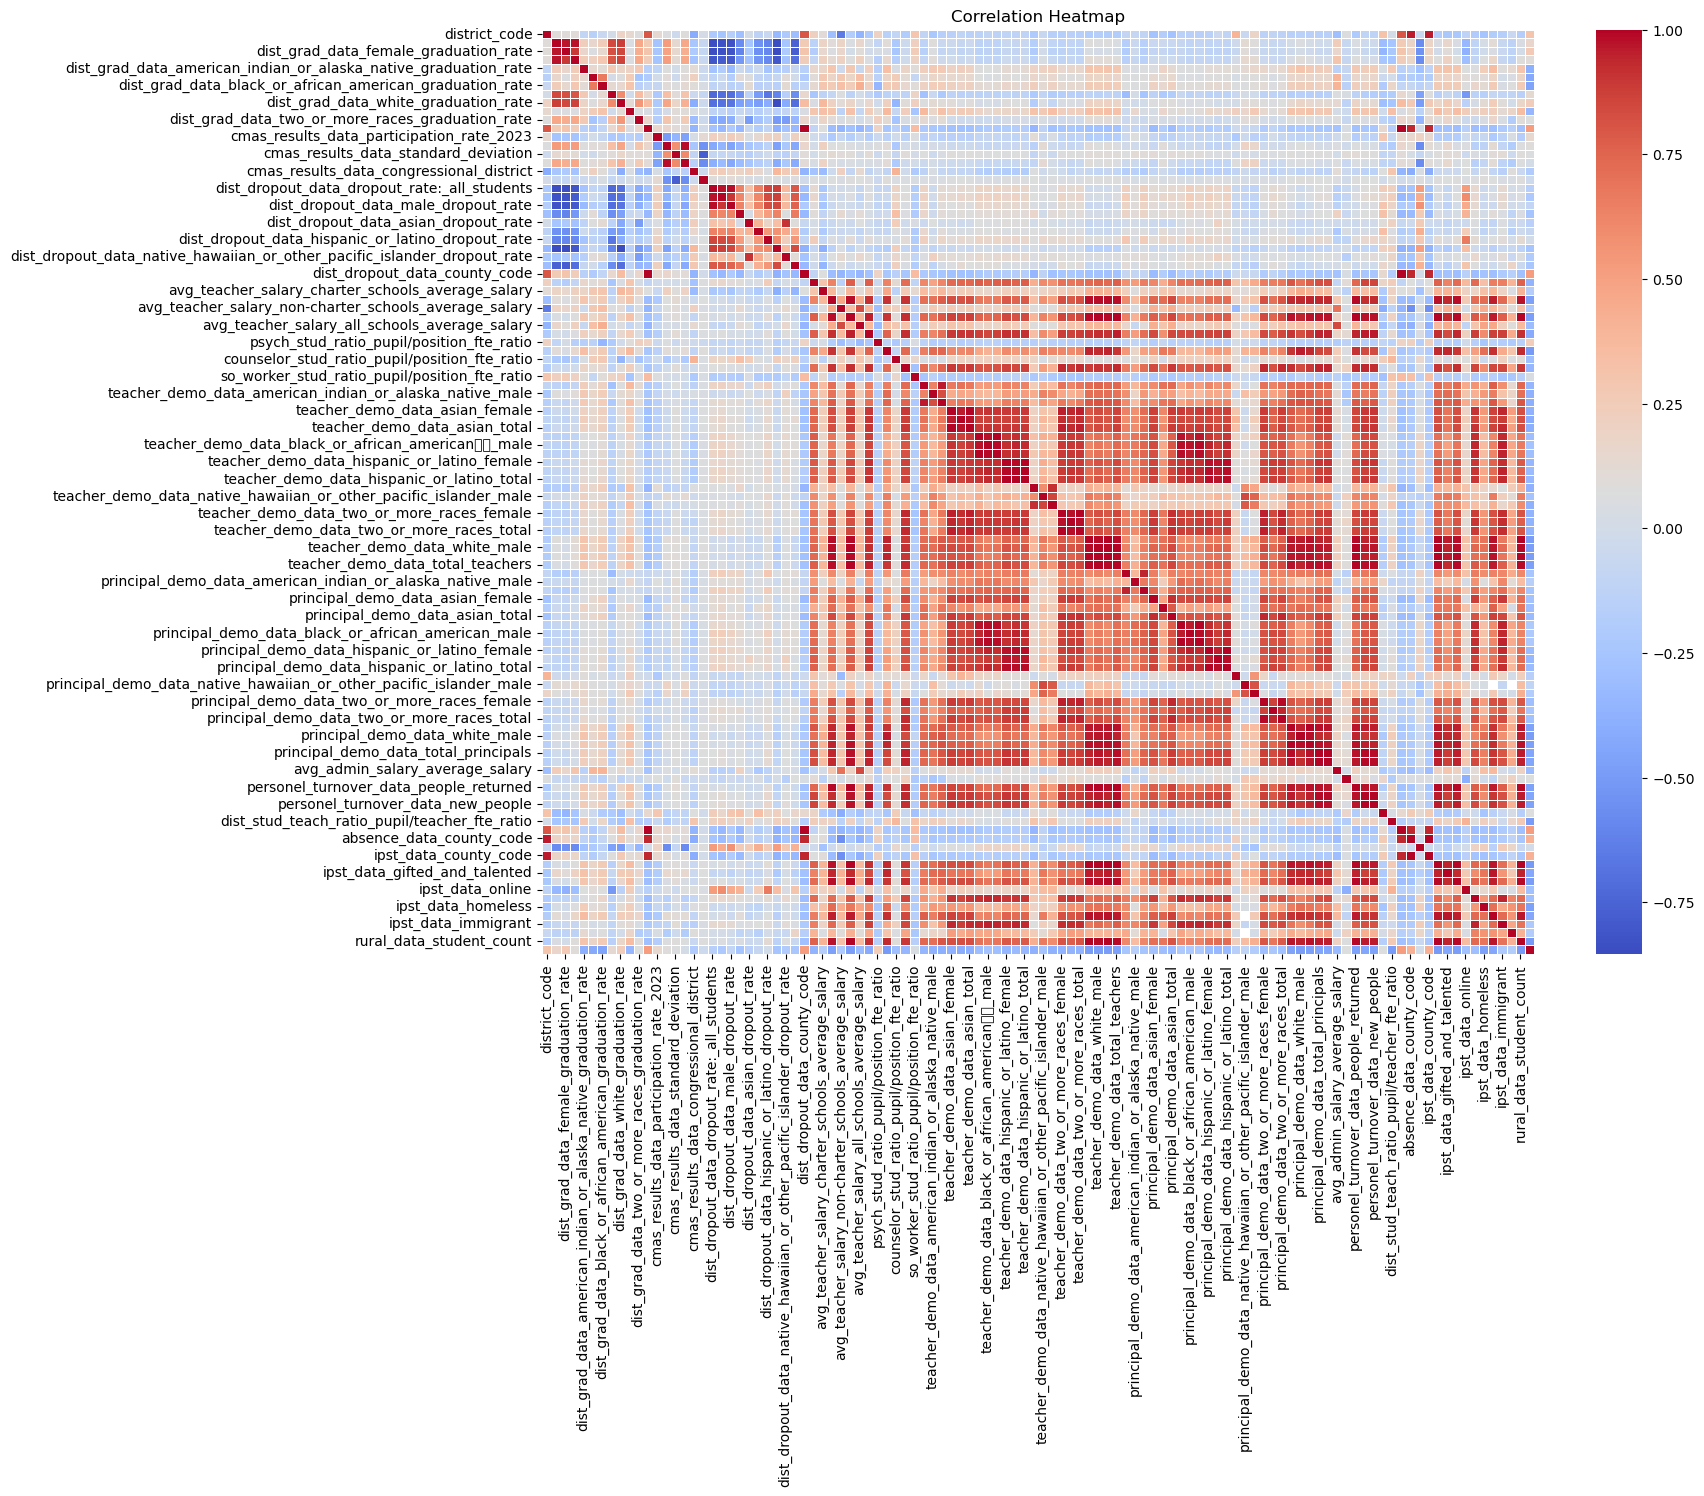

In [62]:
# Created a heatmap with all data, kind of useless but just wanted to.
warnings.filterwarnings("ignore", category=UserWarning) 
plt.figure(figsize=(16, 12))
sns.heatmap(normalized_df.corr(), cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Training and Histogram-based Gradient Boosting Regression Tree

## Target Feature of All Student Graduation Rate Using Non-Normalized Data to Guage Performance Improvement

In [63]:
# Will drop all graduation rate features to improve performance and they are false triggering importance to our target feature of all student graduation rate
drop_grad_dropout_columns = ["dist_grad_data_all_students_graduation_rate", 
        'dist_grad_data_female_graduation_rate',
       'dist_grad_data_male_graduation_rate',
       'dist_grad_data_american_indian_or_alaska_native_graduation_rate',
       'dist_grad_data_asian_graduation_rate',
       'dist_grad_data_black_or_african_american_graduation_rate',
       'dist_grad_data_hispanic_or_latino_graduation_rate',
       'dist_grad_data_white_graduation_rate',
       'dist_grad_data_native_hawaiian_or_other_pacific_islander_graduation_rate',
       'dist_grad_data_two_or_more_races_graduation_rate',
        'dist_dropout_data_dropout_rate:_all_students',
       'dist_dropout_data_female_dropout_rate',
       'dist_dropout_data_male_dropout_rate',
       'dist_dropout_data_american_indian_or_alaska_native_dropout_rate',
       'dist_dropout_data_asian_dropout_rate',
       'dist_dropout_data_black_or_african_american_dropout_rate',
       'dist_dropout_data_hispanic_or_latino_dropout_rate',
       'dist_dropout_data_white_dropout_rate',
       'dist_dropout_data_native_hawaiian_or_other_pacific_islander_dropout_rate',
       'dist_dropout_data_two_or_more_races_dropout_rate']

In [64]:
# Splitting data
X = merged_dist_data.drop(drop_grad_dropout_columns, axis=1)
y = merged_dist_data["dist_grad_data_all_students_graduation_rate"] 

In [65]:
# Training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Grid Search to find best hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'l2_regularization': [0, 0.1, 0.5]
}

model = HistGradientBoostingRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

In [67]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'l2_regularization': [0, 0.1, 0.5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 5, 10],
                         'max_iter': [100, 200, 300],
                         'min_samples_leaf': [1, 5, 10]},
             scoring='neg_mean_squared_error')

In [68]:
# Best Parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'l2_regularization': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 1}
Best score:  -0.00029363947132603414


In [69]:
# Model is set to best parameters
best_model = grid_search.best_estimator_

In [70]:
# Fitting the data
best_model.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.2,
                              max_depth=5, min_samples_leaf=1)

In [71]:
# Declaring prediction variable
y_pred = best_model.predict(X_test)

In [72]:
# Scores of the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R-squared:", r2)

MAE: 0.002608229150747145
R-squared: 0.9950143658078152


In [73]:
# Print out list of feature importance from strongest positive to strongest negative using Negative mean absolute error
result = permutation_importance(best_model, X_test, y_test, scoring='neg_mean_absolute_error', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

absence_data_chronically_absent_rate                                    5.811118e-02
district_code                                                           2.015435e-02
avg_teacher_salary_non-charter_schools_average_salary                   2.013670e-02
ipst_data_homeless                                                      1.360542e-02
avg_admin_salary_average_salary                                         5.973931e-03
                                                                            ...     
principal_demo_data_native_hawaiian_or_other_pacific_islander_male      0.000000e+00
principal_demo_data_native_hawaiian_or_other_pacific_islander_female    0.000000e+00
district_cmas_content_code                                             -1.892759e-09
principal_demo_data_two_or_more_races_male                             -2.702896e-07
principal_demo_data_native_hawaiian_or_other_pacific_islander_total    -1.103031e-06
Length: 88, dtype: float64


In [74]:
# Print out list of feature importance from strongest positive to strongest negative using r2 score
result = permutation_importance(best_model, X_test, y_test, scoring='r2', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

absence_data_chronically_absent_rate                     1.618810
avg_teacher_salary_non-charter_schools_average_salary    0.384736
district_code                                            0.324931
ipst_data_homeless                                       0.181031
personel_turnover_data_new_people                        0.058516
                                                           ...   
principal_demo_data_white_female                        -0.000006
psych_stud_ratio_position_head_count                    -0.000015
counselor_stud_ratio_pupil/position_fte_ratio           -0.000055
ipst_data_online                                        -0.000088
cmas_results_data_participation_rate_2023               -0.000363
Length: 88, dtype: float64


## Running on Normalized dataset

In [75]:
X = normalized_df.drop(drop_grad_dropout_columns, axis=1)
y = normalized_df["dist_grad_data_all_students_graduation_rate"] 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'l2_regularization': [0, 0.1, 0.5]
}

model = HistGradientBoostingRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

In [78]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'l2_regularization': [0, 0.1, 0.5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 5, 10],
                         'max_iter': [100, 200, 300],
                         'min_samples_leaf': [1, 5, 10]},
             scoring='neg_mean_squared_error')

In [79]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'l2_regularization': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 1}
Best score:  -0.001755729920414979


In [80]:
best_model = grid_search.best_estimator_

In [81]:
best_model.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.2,
                              max_depth=5, min_samples_leaf=1)

In [82]:
y_pred = best_model.predict(X_test)

In [83]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42) 

In [84]:
scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())
print("RMSE standard deviation:", rmse_scores.std())

RMSE scores: [0.0088923  0.01804166 0.01786367 0.10027141 0.0017181 ]
Average RMSE: 0.02935742761869829
RMSE standard deviation: 0.03597693458208704


In [85]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R-squared:", r2)

MAE: 0.0044818575441891275
R-squared: 0.997873510997849


In [86]:
result = permutation_importance(best_model, X_test, y_test, scoring='neg_mean_absolute_error', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

absence_data_chronically_absent_rate                                   1.428813e-01
avg_teacher_salary_non-charter_schools_average_salary                  5.227729e-02
district_code                                                          4.707664e-02
ipst_data_homeless                                                     3.154597e-02
avg_admin_salary_average_salary                                        1.575254e-02
                                                                           ...     
district_cmas_content_code                                            -7.049883e-08
principal_demo_data_two_or_more_races_male                            -8.845475e-07
principal_demo_data_native_hawaiian_or_other_pacific_islander_total   -2.696901e-06
teacher_demo_data_two_or_more_races_female                            -1.418596e-05
psych_stud_ratio_position_head_count                                  -1.862606e-05
Length: 88, dtype: float64


In [87]:
result = permutation_importance(best_model, X_test, y_test, scoring='r2', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

absence_data_chronically_absent_rate                     1.552694
avg_teacher_salary_non-charter_schools_average_salary    0.428541
district_code                                            0.284781
ipst_data_homeless                                       0.148431
personel_turnover_data_new_people                        0.055299
                                                           ...   
district_cmas_content_code                              -0.000001
personel_turnover_data_turnover_rate                    -0.000007
teacher_demo_data_two_or_more_races_female              -0.000007
psych_stud_ratio_position_head_count                    -0.000024
counselor_stud_ratio_pupil/position_fte_ratio           -0.000053
Length: 88, dtype: float64


## Target Feature of Hispanic or Latino Graduation Rates

In [88]:
normalized_df.dropna(subset=['dist_grad_data_hispanic_or_latino_graduation_rate'], inplace=True)

In [89]:
X = normalized_df.drop(drop_grad_dropout_columns, axis=1)
y = normalized_df["dist_grad_data_all_students_graduation_rate"] 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
model = HistGradientBoostingRegressor(max_iter=100, random_state=42)  
model.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=42)

In [92]:
y_pred = model.predict(X_test)

In [93]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R-squared:", r2)

MAE: 0.04538590916916017
R-squared: 0.8909261899968248


In [94]:
result = permutation_importance(model, X_test, y_test, scoring='neg_mean_absolute_error', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

absence_data_chronically_absent_rate                 0.097783
ipst_data_homeless                                   0.025165
personel_turnover_data_difference                    0.021250
district_code                                        0.019835
psych_stud_ratio_pupil/position_fte_ratio            0.011506
                                                       ...   
counselor_stud_ratio_pupil/position_fte_ratio       -0.000122
principal_demo_data_white_total                     -0.000224
cmas_results_data_standard_deviation                -0.000438
principal_demo_data_hispanic_or_latino_male         -0.000750
teacher_demo_data_black_or_african_american_total   -0.001219
Length: 88, dtype: float64


In [95]:
result = permutation_importance(model, X_test, y_test, scoring='r2', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

absence_data_chronically_absent_rate                 0.897950
ipst_data_homeless                                   0.147477
district_code                                        0.102068
personel_turnover_data_difference                    0.074559
avg_teacher_salary_all_schools_average_salary        0.060660
                                                       ...   
ipst_data_immigrant                                 -0.000259
counselor_stud_ratio_pupil/position_fte_ratio       -0.000366
cmas_results_data_standard_deviation                -0.001784
principal_demo_data_hispanic_or_latino_male         -0.002064
teacher_demo_data_black_or_african_american_total   -0.003644
Length: 88, dtype: float64


## Target of Black or African American Graduation Rate

In [96]:
normalized_df.dropna(subset=['dist_grad_data_black_or_african_american_graduation_rate'], inplace=True)

In [97]:
X = normalized_df.drop(drop_grad_dropout_columns, axis=1)
y = normalized_df["dist_grad_data_black_or_african_american_graduation_rate"] 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model = HistGradientBoostingRegressor(max_iter=100, random_state=42)  
model.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=42)

In [100]:
y_pred = model.predict(X_test)

In [101]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R-squared:", r2)

MAE: 0.043874503514714926
R-squared: 0.9380400585514713


In [102]:
result = permutation_importance(model, X_test, y_test, scoring='neg_mean_absolute_error', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

ipst_data_homeless                               0.050348
teacher_demo_data_white_male                     0.048399
ipst_data_immigrant                              0.046753
avg_teacher_salary_all_schools_average_salary    0.038097
teacher_demo_data_asian_female                   0.031175
                                                   ...   
rural_data_rural_code                            0.000000
teacher_demo_data_two_or_more_races_female      -0.000037
so_worker_stud_ratio_position_headcount         -0.000213
teacher_demo_data_asian_male                    -0.000232
ipst_data_total_pk-12_pupil_membership          -0.000639
Length: 88, dtype: float64


In [103]:
result = permutation_importance(model, X_test, y_test, scoring='r2', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

teacher_demo_data_white_male                     0.222261
ipst_data_immigrant                              0.194660
teacher_demo_data_asian_female                   0.180047
ipst_data_homeless                               0.165096
avg_teacher_salary_all_schools_average_salary    0.135223
                                                   ...   
rural_data_rural_code                            0.000000
so_worker_stud_ratio_position_headcount         -0.000027
teacher_demo_data_asian_male                    -0.000185
ipst_data_total_pk-12_pupil_membership          -0.002000
personel_turnover_data_turnover_rate            -0.002286
Length: 88, dtype: float64


## Target Feature of All Students Dropout Rate

In [104]:
X = merged_dist_data.drop(drop_grad_dropout_columns, axis=1)
y = merged_dist_data['dist_dropout_data_dropout_rate:_all_students'] 

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
model = HistGradientBoostingRegressor(max_iter=100, random_state=42)  
model.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=42)

In [107]:
y_pred = model.predict(X_test)

In [108]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R-squared:", r2)

MAE: 0.002581295028701744
R-squared: 0.8712696545992678


In [109]:
result = permutation_importance(model, X_test, y_test, scoring='neg_mean_absolute_error', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

absence_data_chronically_absent_rate                                0.005286
ipst_data_homeless                                                  0.001962
district_code                                                       0.001521
personel_turnover_data_difference                                   0.000808
teacher_demo_data_native_hawaiian_or_other_pacific_islander_male    0.000804
                                                                      ...   
cmas_results_data_mean_scale_score                                 -0.000017
avg_teacher_salary_charter_schools_average_salary                  -0.000033
avg_admin_salary_average_salary                                    -0.000041
teacher_demo_data_black_or_african_american_female                 -0.000064
teacher_demo_data_two_or_more_races_male                           -0.000103
Length: 88, dtype: float64


In [110]:
result = permutation_importance(model, X_test, y_test, scoring='r2', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

absence_data_chronically_absent_rate                                1.323997
ipst_data_homeless                                                  0.254533
district_code                                                       0.202698
dist_stud_teach_ratio_pupil/teacher_fte_ratio                       0.068904
teacher_demo_data_native_hawaiian_or_other_pacific_islander_male    0.067565
                                                                      ...   
cmas_results_data_mean_scale_score                                 -0.000535
teacher_demo_data_black_or_african_american_female                 -0.002342
avg_teacher_salary_charter_schools_average_salary                  -0.003697
avg_admin_salary_average_salary                                    -0.005780
teacher_demo_data_two_or_more_races_male                           -0.006497
Length: 88, dtype: float64


## Target Feature of All Absence Data

In [111]:
drop_grad_dropout_columns.append('absence_data_chronically_absent_rate')

In [112]:
X = normalized_df.drop(drop_grad_dropout_columns, axis=1)
y = normalized_df["absence_data_chronically_absent_rate"] 

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'l2_regularization': [0, 0.1, 0.5]
}

model = HistGradientBoostingRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

In [115]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'l2_regularization': [0, 0.1, 0.5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 5, 10],
                         'max_iter': [100, 200, 300],
                         'min_samples_leaf': [1, 5, 10]},
             scoring='neg_mean_squared_error')

In [116]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'l2_regularization': 0, 'learning_rate': 0.1, 'max_depth': None, 'max_iter': 300, 'min_samples_leaf': 10}
Best score:  -0.012710143739564726


In [117]:
best_model = grid_search.best_estimator_

In [118]:
best_model.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0, max_iter=300,
                              min_samples_leaf=10)

In [119]:
y_pred = best_model.predict(X_test)

In [120]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R-squared:", r2)

MAE: 0.04424799408715187
R-squared: 0.8790995959512007


In [121]:
result = permutation_importance(best_model, X_test, y_test, scoring='neg_mean_absolute_error', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

ipst_data_homeless                                      0.038376
cmas_results_data_mean_scale_score                      0.031447
avg_teacher_salary_charter_schools_average_salary       0.024897
ipst_data_immigrant                                     0.022685
psych_stud_ratio_pupil/position_fte_ratio               0.019838
                                                          ...   
principal_demo_data_black_or_african_american_female   -0.000048
teacher_demo_data_asian_male                           -0.000116
teacher_demo_data_white_male                           -0.000180
teacher_demo_data_two_or_more_races_female             -0.000195
district_cmas_content_code                             -0.000279
Length: 87, dtype: float64


In [122]:
result = permutation_importance(best_model, X_test, y_test, scoring='r2', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

cmas_results_data_mean_scale_score                   0.178056
ipst_data_homeless                                   0.145858
ipst_data_immigrant                                  0.073619
ipst_data_section_504_handicapped                    0.073593
avg_teacher_salary_charter_schools_average_salary    0.069071
                                                       ...   
teacher_demo_data_asian_male                        -0.000095
principal_demo_data_hispanic_or_latino_total        -0.000183
so_worker_stud_ratio_position_headcount             -0.000370
cmas_results_data_congressional_district            -0.002207
cmas_results_data_participation_rate_2023           -0.002980
Length: 87, dtype: float64


## Target Feature of Homeless Data

In [123]:
df_filt = merged_dist_data.dropna(subset=['ipst_data_homeless'])

In [124]:
X = df_filt.drop('ipst_data_homeless', axis=1)
y = df_filt["ipst_data_homeless"] 

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'l2_regularization': [0, 0.1, 0.5]
}

model = HistGradientBoostingRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

In [127]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'l2_regularization': [0, 0.1, 0.5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 5, 10],
                         'max_iter': [100, 200, 300],
                         'min_samples_leaf': [1, 5, 10]},
             scoring='neg_mean_squared_error')

In [128]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 5}
Best score:  -3195.6340453851126


In [129]:
best_model = grid_search.best_estimator_

In [130]:
best_model.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.1, max_depth=5,
                              min_samples_leaf=5)

In [131]:
y_pred = best_model.predict(X_test)

In [132]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R-squared:", r2)

MAE: 11.504854828136827
R-squared: 0.9881818800848521


In [133]:
result = permutation_importance(best_model, X_test, y_test, scoring='neg_mean_absolute_error', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

avg_teacher_salary_non-charter_schools_total_fte                      113.353428
principal_demo_data_white_female                                      110.314665
ipst_data_migrant                                                      24.205189
avg_teacher_salary_charter_schools_total_fte                           17.599987
dist_grad_data_all_students_graduation_rate                            13.453261
                                                                         ...    
principal_demo_data_two_or_more_races_female                            0.000000
principal_demo_data_hispanic_or_latino_male                             0.000000
principal_demo_data_native_hawaiian_or_other_pacific_islander_male      0.000000
teacher_demo_data__american_indian_or_alaska_native_female              0.000000
principal_demo_data_asian_male                                         -0.020405
Length: 107, dtype: float64


In [134]:
result = permutation_importance(best_model, X_test, y_test, scoring='r2', n_repeats=5, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X_test.columns)
print(feature_importances.sort_values(ascending=False))

principal_demo_data_white_female                                      7.349601e-01
avg_teacher_salary_non-charter_schools_total_fte                      4.232299e-01
avg_teacher_salary_charter_schools_total_fte                          5.037698e-02
dist_grad_data_all_students_graduation_rate                           3.123972e-02
ipst_data_migrant                                                     2.605321e-02
                                                                          ...     
teacher_demo_data_native_hawaiian_or_other_pacific_islander_female   -7.391125e-07
rural_data_rural_code                                                -1.073502e-05
teacher_demo_data_native_hawaiian_or_other_pacific_islander_total    -2.860539e-05
ipst_data_el_incl._m1_and_m2                                         -6.634678e-05
dist_grad_data_black_or_african_american_graduation_rate             -1.649077e-04
Length: 107, dtype: float64


In [135]:
merged_dist_data_sorted = merged_dist_data.sort_values(by=['ipst_data_homeless', 'dist_grad_data_all_students_graduation_rate'], ascending=[False, False])
merged_dist_data_sorted.head(10)

,district_code,dist_grad_data_all_students_graduation_rate,dist_grad_data_female_graduation_rate,dist_grad_data_male_graduation_rate,dist_grad_data_american_indian_or_alaska_native_graduation_rate,dist_grad_data_asian_graduation_rate,dist_grad_data_black_or_african_american_graduation_rate,dist_grad_data_hispanic_or_latino_graduation_rate,dist_grad_data_white_graduation_rate,dist_grad_data_native_hawaiian_or_other_pacific_islander_graduation_rate,...,ipst_data_gifted_and_talented,ipst_data_special_education,ipst_data_online,ipst_data_el_incl._m1_and_m2,ipst_data_homeless,ipst_data_section_504_handicapped,ipst_data_immigrant,ipst_data_migrant,rural_data_student_count,rural_data_rural_code
3,20,0.848,0.865,0.833,0.737,0.940,0.907,0.768,0.915,0.980,...,4359,4419,815,5557,1055,1852,820,33,34631,0
4,20,0.848,0.865,0.833,0.737,0.940,0.907,0.768,0.915,0.980,...,4359,4419,815,5557,1055,1852,820,33,34631,0
5,20,0.848,0.865,0.833,0.737,0.940,0.907,0.768,0.915,0.980,...,4359,4419,815,5557,1055,1852,820,33,34631,0
26,180,0.749,0.801,0.702,0.500,0.866,0.789,0.735,0.781,0.583,...,2149,5321,213,14995,988,<NA>,1110,100,37302,0
27,180,0.749,0.801,0.702,0.500,0.866,0.789,0.735,0.781,0.583,...,2149,5321,213,14995,988,<NA>,1110,100,37302,0
28,180,0.749,0.801,0.702,0.500,0.866,0.789,0.735,0.781,0.583,...,2149,5321,213,14995,988,<NA>,1110,100,37302,0
90,1550,0.869,0.880,0.858,0.727,0.925,0.808,0.746,0.904,0.020,...,3310,2845,303,1551,976,1714,197,22,29206,0
91,1550,0.869,0.880,0.858,0.727,0.925,0.808,0.746,0.904,0.020,...,3310,2845,303,1551,976,1714,197,22,29206,0
92,1550,0.869,0.880,0.858,0.727,0.925,0.808,0.746,0.904,0.020,...,3310,2845,303,1551,976,1714,197,22,29206,0
83,1420,0.850,0.883,0.819,0.868,0.937,0.769,0.747,0.889,0.600,...,7847,9370,923,4701,940,3492,516,21,74783,0


# Visualizations

In [136]:
# Change data types for visualization
merged_dist_data['absence_data_chronically_absent_rate'] = merged_dist_data['absence_data_chronically_absent_rate'].astype(float)
merged_dist_data['ipst_data_homeless'] = merged_dist_data['ipst_data_homeless'].astype(float)

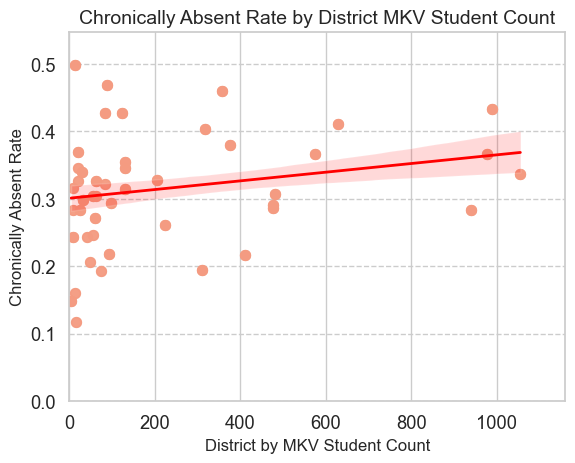

In [153]:
# Visualization regression plot with KWS line using Seaborn
sns.set_theme(style="whitegrid", font_scale=1.2)

ax = sns.regplot(x='ipst_data_homeless', 
                 y='absence_data_chronically_absent_rate', 
                 data=df_filtered,
                 scatter_kws={'color':'#f49b81', 'marker': 'o', 's': 50},  
                 line_kws={'color': 'red', 'linewidth': 2},  
                 ci=95) 

plt.title('Chronically Absent Rate by District MKV Student Count', fontsize=14)
plt.xlabel('District by MKV Student Count', fontsize=12)
plt.ylabel('Chronically Absent Rate', fontsize=12)

plt.xlim(0, df_filtered['ipst_data_homeless'].max() * 1.1) 
plt.ylim(0, df_filtered['absence_data_chronically_absent_rate'].max() * 1.1)  

plt.grid(axis='y', linestyle='--') 

plt.savefig("chronic_absence_rate_plot.png")
plt.show()

## Combining rural data with IPST Graduation Rates

In [188]:
ipst_grad_data = pd.read_excel('Practicum Data/IPST Graduation Rates.xlsx')
ipst_grad_data.head()

,Organization Code,AYG Cohort Size (All Students),All Students Graduation Rate,All Students Completion Rate,Students with Disabilities AYG Cohort,Students with Disabilities Graduation Rate,Students with Disabilities Completion Rate,English Learners AYG Cohort,English Learners Graduation Rate,English Learners Completion Rate,...,Homeless Completion Rate,Gifted-Talented AYG Cohort,Gifted-Talented Graduation Rate,Gifted-Talented Completion Rate,Military Connected AYG Cohort,Military Connected Graduation Rate,Military Connected Completion Rate,Foster AYG Cohort,Foster Graduation Rate,Foster Completion Rate
0,10,517,68.5%,70.4%,54,50.0%,53.7%,172,64.0%,64.5%,...,54.5%,51,86.3%,90.2%,50 or less,<= 2%,<= 2%,50 or less,<= 2%,<= 2%
1,20,"2,925",84.8%,85.4%,302,81.1%,81.5%,521,68.3%,68.5%,...,65.7%,365,96.7%,97.3%,71,90.1%,90.1%,50 or less,36.4%,45.5%
2,30,497,68.8%,71.6%,62,61.3%,62.9%,218,66.1%,67.4%,...,42.4%,50 or less,92.0%,96.0%,50 or less,50.0%,50.0%,50 or less,50.0%,50.0%
3,40,"1,620",88.1%,89.0%,157,79.0%,80.3%,201,80.6%,80.6%,...,69.5%,97,95.9%,97.9%,50 or less,80.0%,80.0%,50 or less,40.0%,60.0%
4,50,98,84.7%,84.7%,50 or less,76.5%,76.5%,50 or less,76.5%,76.5%,...,75.0%,50 or less,>= 98%,>= 98%,50 or less,<= 2%,<= 2%,50 or less,<= 2%,<= 2%


In [189]:
# Cleanup column names
ipst_grad_data.columns = ipst_grad_data.columns.str.lower().str.replace(' ', '_')
ipst_grad_data.rename(columns={'organization_code': 'district_code'}, inplace=True)

In [192]:
# Convert random data issues to numerical
str_cols = [col for col in ipst_grad_data.columns if 'cohort' in col]

for column in str_cols:
    ipst_grad_data[column] = ipst_grad_data[column].astype(str).str.replace('50 or less', '50', regex=False)
    ipst_grad_data[column] = ipst_grad_data[column].astype(str).str.replace(',', '', regex=False)

In [193]:
# Convert percentages to float values
perc_cols = [col for col in ipst_grad_data.columns if 'graduation_rate' in col]

for column in perc_cols:
    ipst_grad_data[column] = ipst_grad_data[column].apply(convert_percentage_to_float)
ipst_grad_data = ipst_grad_data.replace("(-)", np.nan)
columns_to_drop = [col for col in ipst_grad_data.columns if 'completion_rate' in col]
ipst_grad_data.drop(columns_to_drop, axis=1, inplace=True) 

In [194]:
ipst_grad_data.head()

,district_code,ayg_cohort_size_(all_students),all_students_graduation_rate,students_with_disabilities_ayg_cohort,students_with_disabilities_graduation_rate,english_learners_ayg_cohort,english_learners_graduation_rate,econ._disadvant._ayg_cohort,econ._disadvant._graduation_rate,migrant_ayg_cohort,...,title_1_ayg_cohort,title_1_graduation_rate,homeless_ayg_cohort,homeless_graduation_rate,gifted-talented_ayg_cohort,gifted-talented_graduation_rate,military_connected_ayg_cohort,military_connected_graduation_rate,foster_ayg_cohort,foster_graduation_rate
0,10,517,0.685,54,0.500,172,0.640,376,0.699,50,...,53,0.679,50,0.545,51,0.863,50,0.020,50,0.020
1,20,2925,0.848,302,0.811,521,0.683,1350,0.757,50,...,134,0.619,198,0.646,365,0.967,71,0.901,50,0.364
2,30,497,0.688,62,0.613,218,0.661,430,0.705,50,...,497,0.688,50,0.364,50,0.920,50,0.500,50,0.500
3,40,1620,0.881,157,0.790,201,0.806,789,0.840,50,...,84,0.810,59,0.678,97,0.959,50,0.800,50,0.400
4,50,98,0.847,50,0.765,50,0.765,50,0.787,50,...,50,0.889,50,0.750,50,0.980,50,0.020,50,0.020


In [195]:
# Merged IPST grad data with rural data
merged_ipst_data = ipst_grad_data.copy()

merged_ipst_data = pd.merge(merged_ipst_data, rural_data, on='district_code', how='inner')

merged_ipst_data.head()

,district_code,ayg_cohort_size_(all_students),all_students_graduation_rate,students_with_disabilities_ayg_cohort,students_with_disabilities_graduation_rate,english_learners_ayg_cohort,english_learners_graduation_rate,econ._disadvant._ayg_cohort,econ._disadvant._graduation_rate,migrant_ayg_cohort,...,homeless_ayg_cohort,homeless_graduation_rate,gifted-talented_ayg_cohort,gifted-talented_graduation_rate,military_connected_ayg_cohort,military_connected_graduation_rate,foster_ayg_cohort,foster_graduation_rate,rural_data_student_count,rural_data_rural_code
0,10,517,0.685,54,0.500,172,0.640,376,0.699,50,...,50,0.545,51,0.863,50,0.020,50,0.020,6554,0
1,20,2925,0.848,302,0.811,521,0.683,1350,0.757,50,...,198,0.646,365,0.967,71,0.901,50,0.364,34631,0
2,30,497,0.688,62,0.613,218,0.661,430,0.705,50,...,50,0.364,50,0.920,50,0.500,50,0.500,5293,0
3,40,1620,0.881,157,0.790,201,0.806,789,0.840,50,...,59,0.678,97,0.959,50,0.800,50,0.400,21892,0
4,50,98,0.847,50,0.765,50,0.765,50,0.787,50,...,50,0.750,50,0.980,50,0.020,50,0.020,1225,1


In [196]:
# Export to csv file
merged_ipst_data.to_csv('merged_ipst_data.csv', index=False)

<Figure size 1000x1000 with 0 Axes>

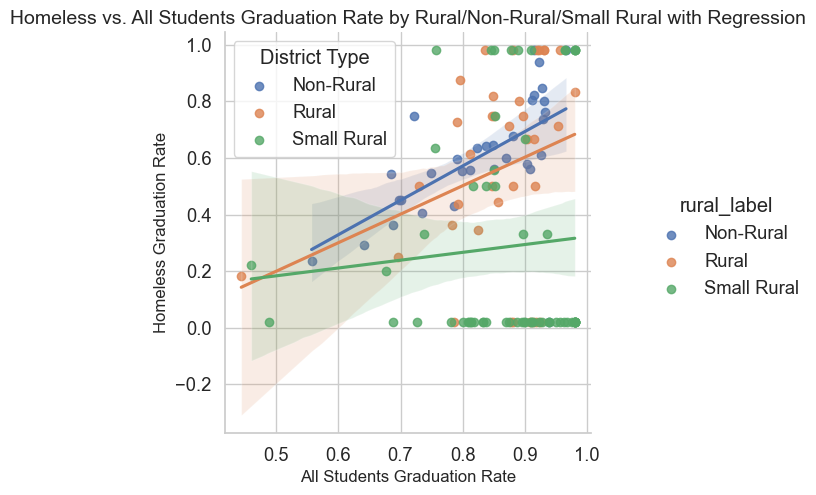

In [187]:
# Unused plot showing homeless graduation rate based on district type
merged_ipst_data['rural_label'] = merged_ipst_data['rural_data_rural_code'].map({0: 'Non-Rural', 1: 'Rural', 2: 'Small Rural'})

plt.figure(figsize=(10, 10))
sns.lmplot(x='all_students_graduation_rate', y='homeless_graduation_rate', hue='rural_label', data=merged_ipst_data)

plt.legend(title='District Type')
plt.xlabel('All Students Graduation Rate', fontsize=12)
plt.ylabel('Homeless Graduation Rate', fontsize=12)
plt.title('Homeless vs. All Students Graduation Rate by Rural/Non-Rural/Small Rural with Regression', fontsize=14)

# Show the plot
plt.show()

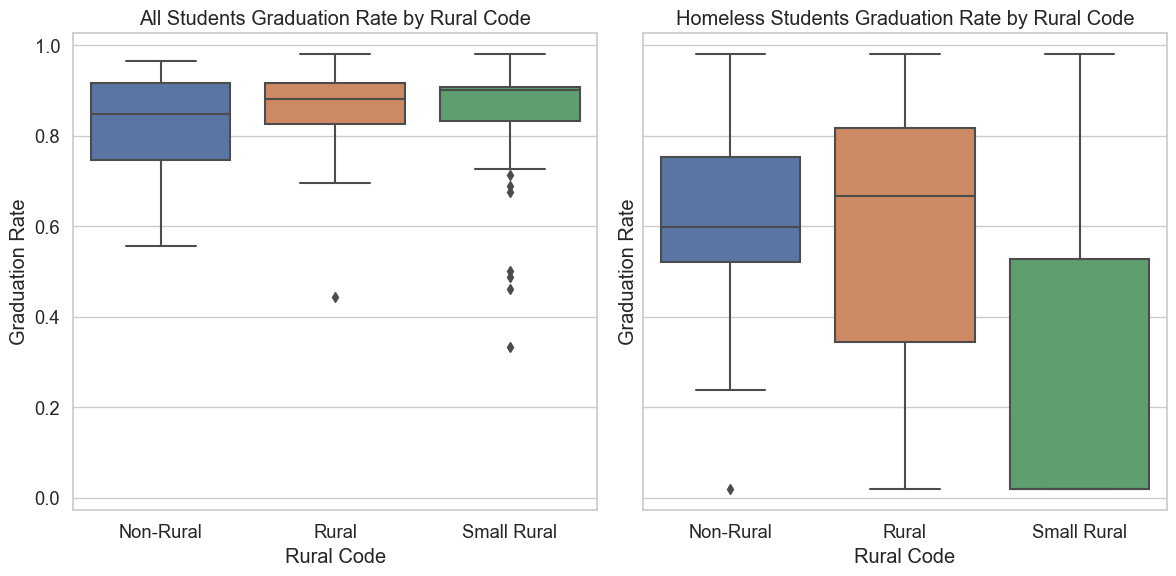

In [198]:
# Filter out rows with missing values in the relevant columns
df_filtered = merged_ipst_data.dropna(subset=['homeless_graduation_rate', 'rural_data_rural_code'])

# Create a figure with two subplots sharing a y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Create the first boxplot for all students
sns.boxplot(x='rural_data_rural_code', y='all_students_graduation_rate', data=merged_ipst_data, ax=axes[0])
axes[0].set_title('All Students Graduation Rate by Rural Code')
axes[0].set_xlabel('Rural Code')
axes[0].set_ylabel('Graduation Rate')

# recode rural labels
rural_code_labels = {0: 'Non-Rural', 1: 'Rural', 2: 'Small Rural'}
axes[0].set_xticks(merged_ipst_data['rural_data_rural_code'].unique())
axes[0].set_xticklabels(rural_code_labels.values())

sns.boxplot(x='rural_data_rural_code', y='homeless_graduation_rate', data=merged_ipst_data, ax=axes[1])
axes[1].set_title('Homeless Students Graduation Rate by Rural Code')
axes[1].set_xlabel('Rural Code')
axes[1].set_ylabel('Graduation Rate')

# Map rural codes to labels and set x-ticks
axes[1].set_xticks(merged_ipst_data['rural_data_rural_code'].unique())
axes[1].set_xticklabels(rural_code_labels.values())

plt.savefig("Grad_boxplots.png")

# Display the plots
plt.tight_layout()
plt.show()